In [2]:
import os
import glob
import numpy as np
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt

##############################################################################################################

# Change file paths here
rgb_image_path = '/sciclone/home/ncrupert/dash_doodler/results/results_exp_1/images'
label_image_path = '/sciclone/home/ncrupert/dash_doodler/results/results_exp_1/labels'

# Saving the histogram to:
histogram_path = '/sciclone/home/ncrupert/dash_doodler/results/RGB_3D_plot'
os.makedirs(histogram_path, exist_ok=True)  # Ensure the directory exists

##############################################################################################################

# Glob so we get matching images and labels
rgb_images = glob.glob(os.path.join(rgb_image_path, '*.jpg'))
label_images = glob.glob(os.path.join(label_image_path, '*_label.jpg'))


# RGB Histograms

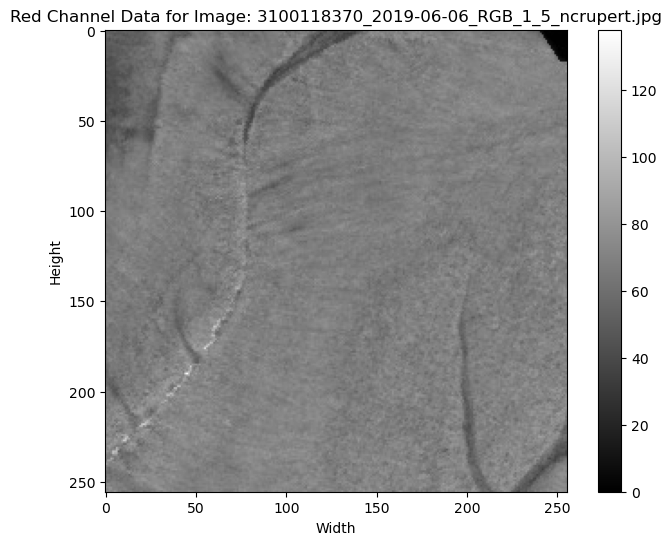

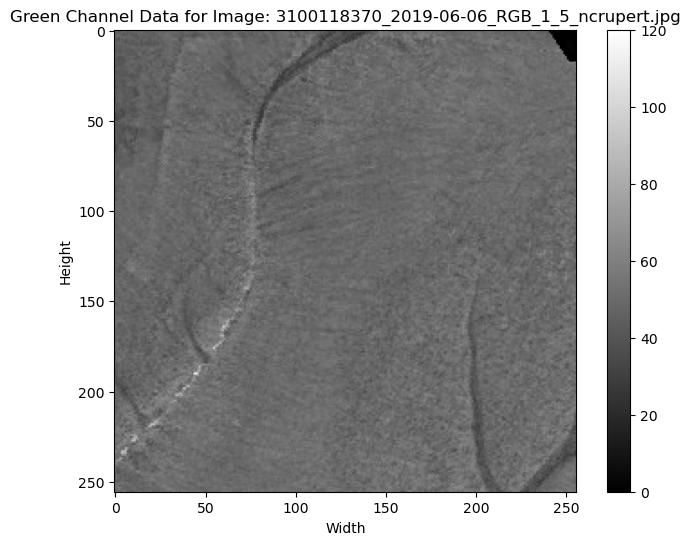

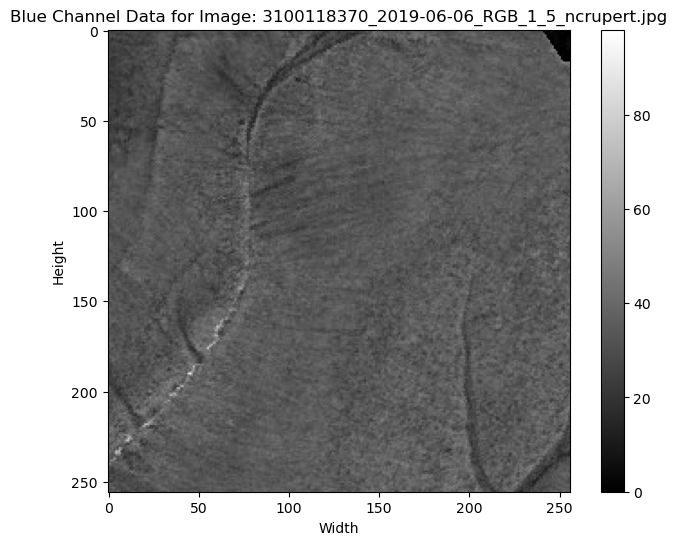

Average redness for water track pixels: 74.0779038880627
Average redness for not water track pixels: 76.1169378218368
Most abundant redness range for water tracks: (51.0, 63.75)
Most abundant redness range for non water tracks: (51.0, 63.75)
Histogram for Red saved to /sciclone/home/ncrupert/dash_doodler/results/RGB_3D_plot/red_histogram.png


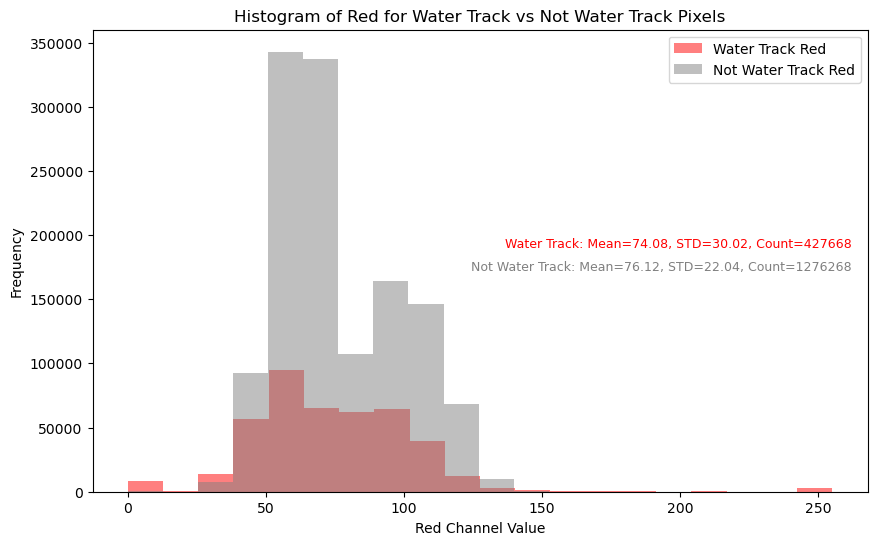

Average greenness for water track pixels: 54.90479998503512
Average greenness for not water track pixels: 54.39825177783976
Most abundant greenness range for water tracks: (51.0, 63.75)
Most abundant greenness range for non water tracks: (51.0, 63.75)
Histogram for Green saved to /sciclone/home/ncrupert/dash_doodler/results/RGB_3D_plot/green_histogram.png


<Figure size 640x480 with 0 Axes>

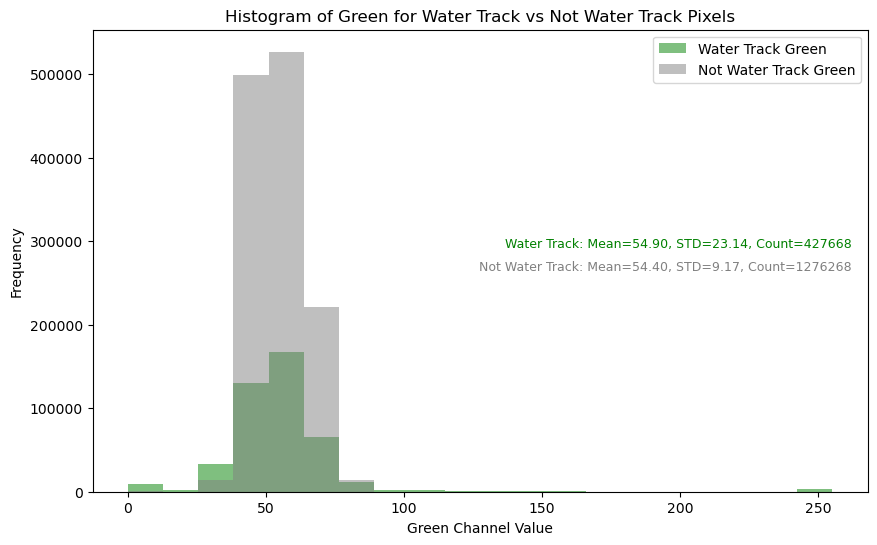

Average blueness for water track pixels: 35.94503212772524
Average blueness for not water track pixels: 33.60036136610806
Most abundant blueness range for water tracks: (25.5, 38.25)
Most abundant blueness range for non water tracks: (25.5, 38.25)
Histogram for Blue saved to /sciclone/home/ncrupert/dash_doodler/results/RGB_3D_plot/blue_histogram.png


<Figure size 640x480 with 0 Axes>

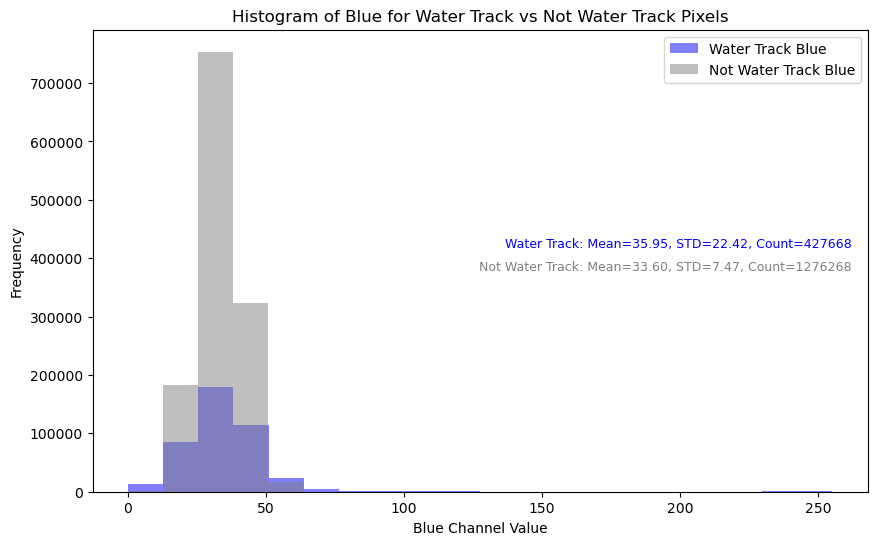

<Figure size 640x480 with 0 Axes>

In [3]:
import os
import glob
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt


##############################################################################################################

# Change file paths here
rgb_image_path = '/sciclone/home/ncrupert/dash_doodler/results/results_exp_1/images'
label_image_path = '/sciclone/home/ncrupert/dash_doodler/results/results_exp_1/labels'

# Saving the histogram to:
histogram_path = '/sciclone/home/ncrupert/dash_doodler/results/RGB_3D_plot'
os.makedirs(histogram_path, exist_ok=True)  # Ensure the directory exists

##############################################################################################################



def process_and_plot(rgb_image_path, label_image_path, histogram_path, channel_index, channel_name, color):

    # Make sure histogram directory exists
    os.makedirs(histogram_path, exist_ok=True)
    

    # Glob for matching images and label pairs
    rgb_images = glob.glob(os.path.join(rgb_image_path, '*.jpg'))
    

    # Lists to store RGB channel values for WT and non-WT pixels
    water_track_values = []
    not_water_track_values = []
    

    # Making a function to extract channel values
    def extract_channel(rgb):
        return rgb[:, :, channel_index]   # channel_index being whatever color channel
    

    # Processing each image-label pair
    for rgb_image_path in rgb_images:
        # Find the corresponding label-image pair based on the filename
        image_name = os.path.basename(rgb_image_path)
        label_image_name = image_name.replace('.jpg', '_label.jpg')
        label_image_path_full = os.path.join(label_image_path, label_image_name)


        if os.path.exists(label_image_path_full):
            # Load RGB image and label image
            rgb_image = np.array(Image.open(rgb_image_path))
            label_image = np.array(Image.open(label_image_path_full))

            # Make sure the label image is binary (a 0 being not water track, 1 being yes water track)
            label_image = (label_image > 0).astype(int)

            # Get channel values
            channel_values = extract_channel(rgb_image)

            # Separate pixels into water track and not water track
            water_track_values.extend(channel_values[label_image == 1])
            not_water_track_values.extend(channel_values[label_image == 0])


    # Converting to numpy arrays
    water_track_values = np.array(water_track_values)
    not_water_track_values = np.array(not_water_track_values)


    # Average values
    avg_water_track = np.mean(water_track_values)
    avg_not_water_track = np.mean(not_water_track_values)


    # Calculate histograms
    water_track_histogram, bin_edges = np.histogram(water_track_values, bins=20)
    not_water_track_histogram, _ = np.histogram(not_water_track_values, bins=20)


    # Most abundant range (WT)
    most_abundant_range_index = np.argmax(water_track_histogram)
    most_abundant_range = (bin_edges[most_abundant_range_index], bin_edges[most_abundant_range_index + 1])


    # Most abundant range (non-WT)
    nonWT_most_abundant_range_index = np.argmax(not_water_track_histogram)
    nonWT_most_abundant_range = (bin_edges[nonWT_most_abundant_range_index], bin_edges[nonWT_most_abundant_range_index + 1])


    # Print results
    print(f'Average {channel_name.lower()}ness for water track pixels: {avg_water_track}')
    print(f'Average {channel_name.lower()}ness for not water track pixels: {avg_not_water_track}')
    print(f'Most abundant {channel_name.lower()}ness range for water tracks: {most_abundant_range}')
    print(f'Most abundant {channel_name.lower()}ness range for non water tracks: {nonWT_most_abundant_range}')


    # Plotting the histograms
    plt.figure(figsize=(10, 6))
    plt.hist(water_track_values, bins=20, alpha=0.5, label=f'Water Track {channel_name}', color=color)
    plt.hist(not_water_track_values, bins=20, alpha=0.5, label=f'Not Water Track {channel_name}', color='gray')


    # Adding statistics to the histogram
    mean_water_track = np.mean(water_track_values)
    std_water_track = np.std(water_track_values)
    count_water_track_pixels = len(water_track_values)

    mean_not_water_track = np.mean(not_water_track_values)
    std_not_water_track = np.std(not_water_track_values)
    count_not_water_track_pixels = len(not_water_track_values)

    plt.text(0.98, 0.55, f'Water Track: Mean={mean_water_track:.2f}, '
                         f'STD={std_water_track:.2f}, Count={count_water_track_pixels}',
             transform=plt.gca().transAxes, fontsize=9, verticalalignment='top', horizontalalignment='right', color=color)

    plt.text(0.98, 0.50, f'Not Water Track: Mean={mean_not_water_track:.2f}, '
                         f'STD={std_not_water_track:.2f}, Count={count_not_water_track_pixels}',
             transform=plt.gca().transAxes, fontsize=9, verticalalignment='top', horizontalalignment='right', color='gray')

    plt.xlabel(f'{channel_name} Channel Value')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {channel_name} for Water Track vs Not Water Track Pixels')
    plt.legend()

    # Saving the histogram
    histogram_file = os.path.join(histogram_path, f'{channel_name.lower()}_histogram.png')
    plt.savefig(histogram_file, dpi=600)
    print(f'Histogram for {channel_name} saved to {histogram_file}')

    # Show the histogram
    plt.show()

    # Clearing the plot to prevent overlap (if function is called multiple times, i.e. different colors)
    plt.clf()


def display_color_channel_array(rgb_image_path, label_image_path, channel_index, channel_name):
    # Select a sample RGB image and its corresponding label image
    rgb_images = glob.glob(os.path.join(rgb_image_path, '*.jpg'))
    
    # In case there's no images for some reason
    if len(rgb_images) == 0:
        print("No images found in the specified directory.")
        return

    # Choose the first RGB image for display
    sample_rgb_image_path = rgb_images[0]
    sample_label_image_name = os.path.basename(sample_rgb_image_path).replace('.jpg', '_label.jpg')
    sample_label_image_path = os.path.join(label_image_path, sample_label_image_name)

    # Check if the label image exists
    if not os.path.exists(sample_label_image_path):
        print(f"Label image for {sample_rgb_image_path} not found.")
        return

    # Load the RGB image and label image
    rgb_image = np.array(Image.open(sample_rgb_image_path))
    label_image = np.array(Image.open(sample_label_image_path))

    # Extract the specific channel
    channel_data = rgb_image[:, :, channel_index]

    # Display the channel data using imshow
    plt.figure(figsize=(8, 6))
    plt.imshow(channel_data, cmap='gray')
    plt.colorbar()
    plt.title(f'{channel_name} Channel Data for Image: {os.path.basename(sample_rgb_image_path)}')
    plt.xlabel('Width')
    plt.ylabel('Height')
    plt.show()


# Display the arrays for each color channel
display_color_channel_array(rgb_image_path, label_image_path, 0, 'Red')
display_color_channel_array(rgb_image_path, label_image_path, 1, 'Green')
display_color_channel_array(rgb_image_path, label_image_path, 2, 'Blue')


# Applying "process_and_plot" to each RGB channel to display histograms
process_and_plot(rgb_image_path, label_image_path, histogram_path, 0, 'Red', 'red')
process_and_plot(rgb_image_path, label_image_path, histogram_path, 1, 'Green', 'green')
process_and_plot(rgb_image_path, label_image_path, histogram_path, 2, 'Blue', 'blue')



# 3D Plot

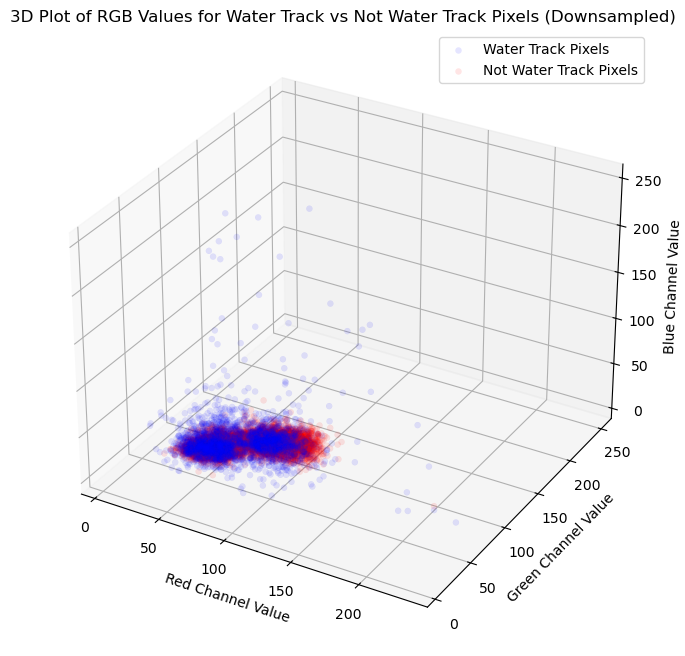

3D plot saved to /sciclone/home/ncrupert/dash_doodler/results/RGB_3D_plot/rgb_3d_plot.png
Total Pixels
1691843

Total Pixels After Downsampling
9668

Red Channel Statistics
Average redness for water track pixels: 74.34184782869568
Average redness for not water track pixels: 76.16671985196975
Most abundant redness range for water tracks: (54.6, 66.75)
Most abundant redness range for non water tracks: (61.0, 72.0)

Green Channel Statistics
Average greenness for water track pixels: 54.855825355778535
Average greenness for not water track pixels: 54.436083245384445
Most abundant greenness range for water tracks: (42.45, 54.6)
Most abundant greenness range for non water tracks: (47.2, 57.5)

Blue Channel Statistics
Average blueness for water track pixels: 36.2759608452708
Average blueness for not water track pixels: 33.622761251958245
Most abundant blueness range for water tracks: (30.3, 42.45)
Most abundant blueness range for non water tracks: (25.5, 35.25)


In [5]:
#============================================================================================================#

# Set the paths for RGB images, labels, and histogram output
rgb_image_path = '/sciclone/home/ncrupert/dash_doodler/results/results_exp_1/images'
label_image_path = '/sciclone/home/ncrupert/dash_doodler/results/results_exp_1/labels'

# Set output file path
output_3d_plot_file = '/sciclone/home/ncrupert/dash_doodler/results/RGB_3D_plot/rgb_3d_plot.png'

# Change sampling rate here, find a good balance
sampling_rate = 175

#============================================================================================================#

# Making the function to collect channel data
def collect_channel_data(rgb_image_path, label_image_path, channel_index):
    rgb_images = glob.glob(os.path.join(rgb_image_path, '*.jpg'))
    water_track_values = []
    not_water_track_values = []

    def extract_channel(rgb):
        return rgb[:, :, channel_index]

    for rgb_image_path in rgb_images:
        image_name = os.path.basename(rgb_image_path)
        label_image_name = image_name.replace('.jpg', '_label.jpg')
        label_image_path_full = os.path.join(label_image_path, label_image_name)

        if os.path.exists(label_image_path_full):
            rgb_image = np.array(Image.open(rgb_image_path))
            label_image = np.array(Image.open(label_image_path_full))

            label_image = (label_image > 0).astype(int)
            channel_values = extract_channel(rgb_image)

            # Filtering out weird jpeg conversion errors
            valid_indices_wt = ((channel_values[label_image == 1] > 5) & (channel_values[label_image == 1] < 250))
            valid_indices_nwt = ((channel_values[label_image == 0] > 5) & (channel_values[label_image == 0] < 250))

            # Using extend to only add "valid" values
            water_track_values.extend(channel_values[label_image == 1][valid_indices_wt])
            not_water_track_values.extend(channel_values[label_image == 0][valid_indices_nwt])

    return np.array(water_track_values), np.array(not_water_track_values)


# Making the function to create a 3D plot and print some statistics
def create_3d_plot_and_stats(water_track_redness, water_track_greenness, water_track_blueness,
                             not_water_track_redness, not_water_track_greenness, not_water_track_blueness,
                             sampling_rate, output_file):
    

    # Downsample water track pixels
    min_len_wt = min(len(water_track_redness[::sampling_rate]), 
                    len(water_track_greenness[::sampling_rate]), 
                    len(water_track_blueness[::sampling_rate]))

    wt_red_sampled = water_track_redness[::sampling_rate][:min_len_wt]
    wt_green_sampled = water_track_greenness[::sampling_rate][:min_len_wt]
    wt_blue_sampled = water_track_blueness[::sampling_rate][:min_len_wt]

    # Downsample non-water track pixels
    min_len_nwt = min(len(not_water_track_redness[::sampling_rate]), 
                    len(not_water_track_greenness[::sampling_rate]), 
                    len(not_water_track_blueness[::sampling_rate]))

    nwt_red_sampled = not_water_track_redness[::sampling_rate][:min_len_nwt]
    nwt_green_sampled = not_water_track_greenness[::sampling_rate][:min_len_nwt]
    nwt_blue_sampled = not_water_track_blueness[::sampling_rate][:min_len_nwt]


    # Creating a 3D plot for downsampled RGB values
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')


    # Plotting downsampled WATER TRACK pixels
    ax.scatter(wt_red_sampled, wt_green_sampled, wt_blue_sampled, c='blue', label='Water Track Pixels', alpha=0.1, linewidth=0.1)


    # Plotting downsampled NON-water track pixels
    ax.scatter(nwt_red_sampled, nwt_green_sampled, nwt_blue_sampled, c='red', label='Not Water Track Pixels', alpha=0.1, linewidth=0.1)


    # Setting axis labels and title
    ax.set_xlabel('Red Channel Value')
    ax.set_ylabel('Green Channel Value')
    ax.set_zlabel('Blue Channel Value')
    ax.set_title('3D Plot of RGB Values for Water Track vs Not Water Track Pixels (Downsampled)')
    ax.legend()


    # Save the 3D plot
    plt.savefig(output_file, dpi=600)
    plt.show()
    print(f'3D plot saved to {output_file}')


    # Total number of pixels
    total_water_track_pixels = len(water_track_greenness)
    total_not_water_track_pixels = len(not_water_track_greenness)
    total_pixels = total_water_track_pixels + total_not_water_track_pixels

    print('Total Pixels')
    print(total_pixels)
    print('')


    # Number of points included POST DOWNSAMPLING
    sampled_water_track_pixels = len(water_track_greenness[::sampling_rate])
    sampled_not_water_track_pixels = len(not_water_track_greenness[::sampling_rate])
    total_sampled_pixels = sampled_water_track_pixels + sampled_not_water_track_pixels

    print('Total Pixels After Downsampling')
    print(total_sampled_pixels)
    print('')


    # Function to calculate the most abundant range
    def calculate_most_abundant_range(values):
        histogram, bin_edges = np.histogram(values, bins=20)
        most_abundant_range_index = np.argmax(histogram)
        return (bin_edges[most_abundant_range_index], bin_edges[most_abundant_range_index + 1])


    # Red Channel Statistics
    most_abundant_range_red = calculate_most_abundant_range(water_track_redness)
    nonWT_most_abundant_range_red = calculate_most_abundant_range(not_water_track_redness)
    print('Red Channel Statistics')
    print(f'Average redness for water track pixels: {np.mean(water_track_redness)}')
    print(f'Average redness for not water track pixels: {np.mean(not_water_track_redness)}')
    print(f'Most abundant redness range for water tracks: {most_abundant_range_red}')
    print(f'Most abundant redness range for non water tracks: {nonWT_most_abundant_range_red}')
    print('')


    # Green Channel Statistics
    most_abundant_range_green = calculate_most_abundant_range(water_track_greenness)
    nonWT_most_abundant_range_green = calculate_most_abundant_range(not_water_track_greenness)
    print('Green Channel Statistics')
    print(f'Average greenness for water track pixels: {np.mean(water_track_greenness)}')
    print(f'Average greenness for not water track pixels: {np.mean(not_water_track_greenness)}')
    print(f'Most abundant greenness range for water tracks: {most_abundant_range_green}')
    print(f'Most abundant greenness range for non water tracks: {nonWT_most_abundant_range_green}')
    print('')


    # Blue Channel Statistics
    most_abundant_range_blue = calculate_most_abundant_range(water_track_blueness)
    nonWT_most_abundant_range_blue = calculate_most_abundant_range(not_water_track_blueness)
    print('Blue Channel Statistics')
    print(f'Average blueness for water track pixels: {np.mean(water_track_blueness)}')
    print(f'Average blueness for not water track pixels: {np.mean(not_water_track_blueness)}')
    print(f'Most abundant blueness range for water tracks: {most_abundant_range_blue}')
    print(f'Most abundant blueness range for non water tracks: {nonWT_most_abundant_range_blue}')


# Collecting the data for each color channel
water_track_redness, not_water_track_redness = collect_channel_data(rgb_image_path, label_image_path, 0)
water_track_greenness, not_water_track_greenness = collect_channel_data(rgb_image_path, label_image_path, 1)
water_track_blueness, not_water_track_blueness = collect_channel_data(rgb_image_path, label_image_path, 2)


# Set output file path
output_3d_plot_file = '/sciclone/home/ncrupert/dash_doodler/results/RGB_3D_plot/rgb_3d_plot.png'


# Call the function with the collected data
create_3d_plot_and_stats(water_track_redness, water_track_greenness, water_track_blueness,
                         not_water_track_redness, not_water_track_greenness, not_water_track_blueness,
                         sampling_rate, output_3d_plot_file)
